# Evaluating COmap using S and T score of valuev

In [293]:
import subprocess as sp
import matplotlib
import Bio.SeqIO
import Bio.Restriction
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import numpy as np

In [237]:
def FindSandTScores(infile_e, infile_w_e, loc = "/s/oak/b/nobackup/darshanw/valuev_optmap_alignment-master/ovlp/"):     
    prg = loc + "ovlp"
    output = loc+ "TempOutput"
    lines_e = [line for line in open(infile_e)]
    lines_w_e = [line for line in open(infile_w_e)]
    temp_file = loc + "temp"

    Naligned = 0
    Sscores = []
    Tscores = []
    #for i in range(0, 2):
    for i in range(0, len(lines_e)/3):
        t = open(temp_file, 'w')
        for j in range(0,3):
            t.write(lines_e[i*3+j])
        for j in range(0,3):
            t.write(lines_w_e[i*3+j])
        t.close()
        rvalue = subprocess.check_output([prg, temp_file, output, "0", "1"], stderr=subprocess.STDOUT)
        rvalue = rvalue.strip().split("\n")
        scores = rvalue[-1].strip().split(":")
        if(len(scores) > 2):
            Naligned += 1
            continue
        else:
            Tscores.append([float(scores[1]), i])
            scores = rvalue[-2].strip().split(":")            
            Sscores.append([float(scores[1]), i])
    
    return([Sscores, Tscores, Naligned])

In [284]:
S1, T1, Na1 = FindSandTScores("/s/oak/b/nobackup/darshanw/COmap/test/sim_single_molecule_100_newDel", "/s/oak/b/nobackup/darshanw/COmap/test/sim_single_molecule_100_efree")

In [285]:
len(S1), len(T1), Na1

(395, 395, 174)

In [286]:
S1[2], T1[2]

([165.941, 3], [36.6, 3])

In [289]:
S2, T2, Na2 = FindSandTScores("/s/oak/b/nobackup/darshanw/COmap/test/sim_single_molecule_100_corrected", "/s/oak/b/nobackup/darshanw/COmap/test/sim_single_molecule_100_efree")

In [290]:
len(S2), len(T2), Na2

(343, 343, 226)

In [291]:
S2[0],

([53.2119, 0],)

In [183]:
add = 0.0
for x in S1:
    add=add+x[0]
avg = add/len(S1)
avg

82.76168539192409

In [184]:
add = 0.0
for x in S2:
    add=add+x[0]
avg = add/len(S2)
avg

75.77041186186187

In [192]:
S1y =  [y[1] for y in S1]
S1y

In [221]:
def getAvg(S):
    add = 0.0
    for x in S:
        add=add+x[0]
    avg = add/len(S)
    return(avg)

In [222]:
getAvg(S1)

84.15731142333522

In [351]:
A = [[30.1, 1], [49.23, 2], [80.53, 3],[20.32, 5]]
B = [[30.1, 1], [49.23, 2], [80.53, 3],[20.32, 5]]
def getCorrespondingValAndPlot(A, B):
    out = []
    if(len(A) == 0 or len(B) == 0):
        return(out);
    Avalues = list(zip(*A)[0])
    Aindex = list(zip(*A)[1])
    Bvalues = list(zip(*B)[0])
    Bindex = list(zip(*B)[1])
    
    for i in range(0, len(Bindex)):
        try:
            indx = Aindex.index(Bindex[i])
        except:
            continue
        out.append([Avalues[indx], Bvalues[i], Bindex[i]])

    plt.plot(zip(*out)[0],zip(*out)[1], "*")
    plt.plot([0, 400], [0, 400], 'r-')
    plt.xlabel("S-score before correction")
    plt.ylabel("S-score after correction")
    plt.show()

    improv = []
    for v in out:
        improv.append(v[1]/v[0])
    plt.hist(improv, 10)
    plt.xlabel("Ratio of S-score after and before correction")
    plt.ylabel("Frequency")
    plt.tight_layout()    
    plt.show()    

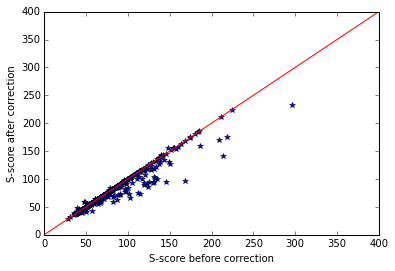

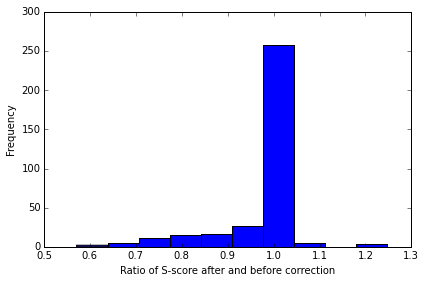

In [352]:
getCorrespondingValAndPlot(S1,S2)